In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.rc('font', size=8)
plt.rc('axes', labelsize=8, titlesize=8)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

# PART A

## 1. Data Understanding & Exploration: [5 Marks]

### A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [5]:
dfCar= pd.read_csv('car name.csv')

In [6]:
dfCar.shape

(398, 1)

In [7]:
dfCar.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


### B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. [1 Mark]

In [8]:
dfAttr= pd.read_json('Car-Attributes.json')

In [9]:
dfAttr.shape

(398, 8)

In [10]:
dfAttr.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


### C. Merge both the DataFrames together to form a single DataFrame [2 Mark]

1. cylinders: multi-valued discrete 
2. acceleration: continuous 
3. displacement: continuous 
4. model year: multi-valued discrete
5. horsepower: continuous 
6. origin: multi-valued discrete
7. weight: continuous car name: string (unique for each instance)
8. mpg: continuous

<b>The data set is about the various features of different brands of cars, 1 observation for different variants of the car (weight) </b>

In [11]:
dfA= pd.merge(dfCar,dfAttr,left_index=True, right_index=True)

In [12]:
dfA.info()
#there are 8 attributes and 398 observations
#There are no nulls in any of the columns
#HorsePower(hp) is loaded as object type but is a continuous variable and needs to be checked and fixed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [13]:
dfA.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [14]:
dfA.sample(10)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
181,honda civic cvcc,33.0,4,91.0,53,1795,17.5,75,3
34,plymouth satellite custom,16.0,6,225.0,105,3439,15.5,71,1
363,buick century,22.4,6,231.0,110,3415,15.8,81,1
388,chrysler lebaron medallion,26.0,4,156.0,92,2585,14.5,82,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
223,dodge monaco brougham,15.5,8,318.0,145,4140,13.7,77,1
37,amc matador,18.0,6,232.0,100,3288,15.5,71,1
347,datsun 210 mpg,37.0,4,85.0,65,1975,19.4,81,3
349,mazda glc 4,34.1,4,91.0,68,1985,16.0,81,3
67,mercury marquis,11.0,8,429.0,208,4633,11.0,72,1


### D. Print 5 point summary of the numerical features and share insights. [1 Marks]

In [15]:
dfA.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


<b>mpg - Miles Per Gallon</b>
- Range: 9 to 46.6 with mean value of 23
- for 25% of the observations have mpg below 17.5
- 25% above 29. 

<b>cyl - number of cylinders</b>
- cylinder is multi-value discrete column, we can check its value counts to get more details
- Range: 3 to 8 
- a few having 3 cylinders
- 50% having 4 
- the rest having 8 cylinders. 

<b>disp - Displacement</b>
- Range: 68 to 455 with mean value of 148.5
- for 25% of the observations below 104.250
- 25% above 262. 

<b>wt - Weight</b>
- Range: 1613 to 5140 with mean value of 2803
- for 25% of the observations below 2223.750
- 25% above 3608. 

<b>acc - acceleration</b>
- Range: 8 to 24.8 with mean value of 15.5
- for 25% of the observations below 13.825
- 25% above 17.175. 
 
 
<b>yr- Model year</b>
multi-value discrete column, we can check its value counts to get more details
- Range: 70 to 82 with mean value of 76
- for 25% of the observations below 73
- 25% are from 79 to 82
 
 
<b>orign</b>
multi-value discrete column, we can check its value counts to get more details
- Range: 1 to 3 with mean value of 73
- for 50% of the observations are from orign 1
-  and the rest from origin 2 and 3
  
 


In [16]:
dfA['cyl'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

In [17]:
dfA['yr'].value_counts()

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: yr, dtype: int64

In [18]:
dfA['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

## 2. Data Preparation & Analysis: [10 Marks] 

### A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. [2 Mark]

#### <p style="color:blue;">From the five point summary we know there are no 0 values in any of the columns (min was >0 for all the columns)</p>

In [19]:
#checking for nulls (as describe function does not take null values into consideration)
dfA.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

There are no null values in any of the columns

In [20]:
#recheck for nulls - none found
null_rows_idx = dfA.isnull().any(axis=1)
dfA.loc[null_rows_idx].head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


In [21]:
#function to get % nulls per column of a dataframe
def percentage_null_sum(df):
    total_cells = df.size
    null_cells = df.isnull().sum().sum()
    percentage = (null_cells / total_cells) * 100
    return percentage

#function to get % nulls per column of a dataframe
def percentage_null_percolumn(df):
    for col in df.columns:
        null_cells = df[col].isnull().sum()
        percentage = (null_cells / df.shape[0]) * 100
        print (f"Percentage of null values in {col} is: {percentage:.2f}%")
        #return percentage

In [22]:
# Calculate percentage of null values
percent_null = percentage_null_sum(dfA)
print(f"Percentage of null values in the DataFrame: {percent_null:.2f}%")

Percentage of null values in the DataFrame: 0.00%


There are no Nulls in the data. 

In [23]:
#gettig null percentage again as the special character was repalced with NAN in horsepower
percentage_null_percolumn(dfA)

Percentage of null values in car_name is: 0.00%
Percentage of null values in mpg is: 0.00%
Percentage of null values in cyl is: 0.00%
Percentage of null values in disp is: 0.00%
Percentage of null values in hp is: 0.00%
Percentage of null values in wt is: 0.00%
Percentage of null values in acc is: 0.00%
Percentage of null values in yr is: 0.00%
Percentage of null values in origin is: 0.00%


In [24]:
#2. Checking for special characters in HorsePower column as it is loaded object type
hpisdigit= pd.DataFrame(dfA.hp.str.isdigit())
dfA[hpisdigit['hp']==False]
#There are 6 rows that have ? in hp columns

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [25]:
#Replacing with Nan
dfA= dfA.replace('?', np.nan)

In [26]:
#dropping columns with Nan (orignal rows with ?)
dfA[hpisdigit['hp']==False]
dfA= dfA.drop(dfA[hpisdigit['hp']==False].index)

In [27]:
dfA.shape

(392, 9)

### B. Check for duplicate values in the data and impute with the best suitable approach. [1 Mark]

In [28]:
dfA.duplicated().sum()
#There are no duplicate columns

0

In [29]:
#Check based on Car Names (Since we have different observations of differet weight cards of a brand,
#we will have duplicates on car_name)
dfA['car_name'].value_counts()
#there are multiple rows for several car types

amc matador            5
ford pinto             5
toyota corolla         5
toyota corona          4
amc hornet             4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: car_name, Length: 301, dtype: int64

In [30]:
grp=dfA.groupby('car_name').size()
grp[grp>1].size
 #there are 56 car type with multiple rows 

56

In [31]:
dfA[dfA['car_name']=='ford pinto'] 
# we have different observations for the same type of cards but the year of observation is different
#so they correspond to different observations and are not repeated data.


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
112,ford pinto,19.0,4,122.0,85.0,2310,18.5,73,1
130,ford pinto,26.0,4,122.0,80.0,2451,16.5,74,1
168,ford pinto,23.0,4,140.0,83.0,2639,17.0,75,1
174,ford pinto,18.0,6,171.0,97.0,2984,14.5,75,1
206,ford pinto,26.5,4,140.0,72.0,2565,13.6,76,1


In [32]:
#check for duplicate without card_name column
dup = dfA.drop('car_name',axis = 1)
dup.duplicated().sum()
#for all the rows of the same car type the rows are unique,
#as they correspond to differnt observations for the same car type 
#therefore we will not use an imputation for duplciates

0

### C. Plot a pairplot for all features. [1 Marks]

In [33]:
numeric_columns= dfA.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']

<Figure size 2000x1500 with 0 Axes>

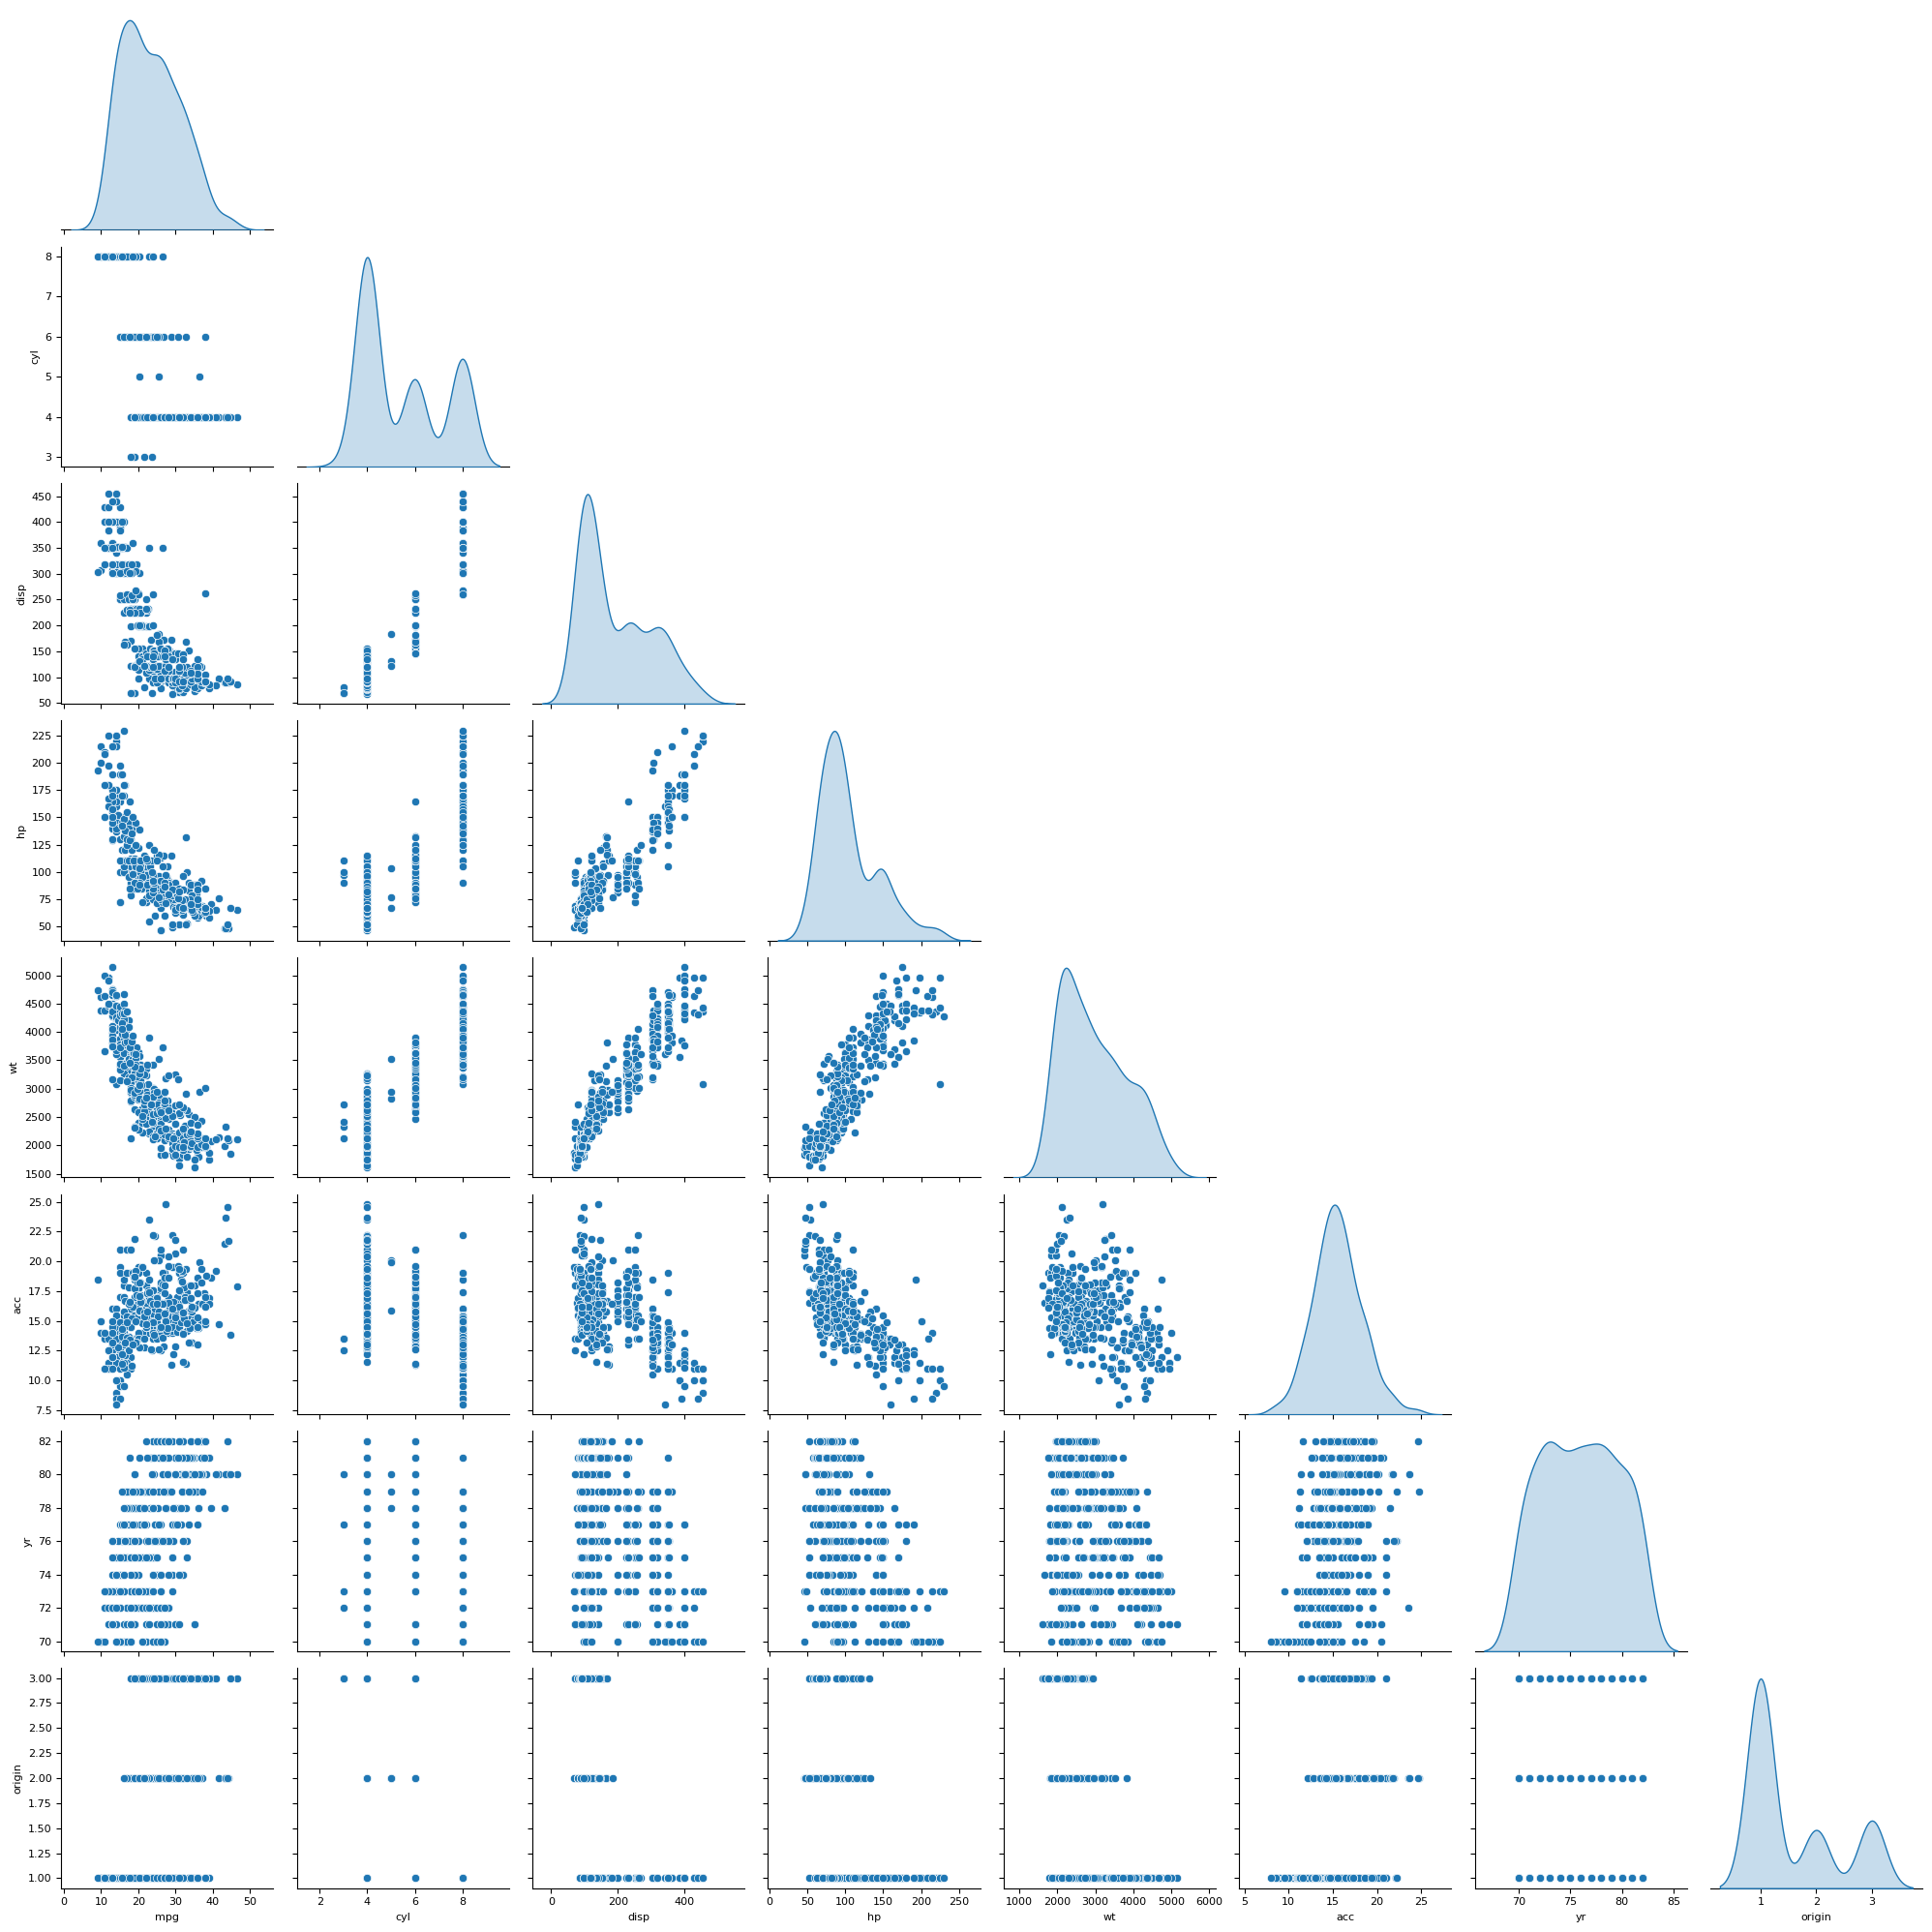

In [34]:
plt.figure(figsize=(20,15))

sns.pairplot(data=dfA, vars=numeric_columns,diag_kind='kde',corner=True, palette= 'bright')
             
plt.show
plt.tight_layout()


<b><p style="color:blue;">Univariate Analysis</p></b>	
- <b>mpg - Miles Per Gallon</b> - Data is Right skewed
- <b>cyl - number of cylinders</b>
1. There are mainly 3 values for cylinder 
2. data is imbalance for Cylinders with maximum observations of 4 cylinder cars
- <b>disp - Displacement</b>- right skewed
- <b>hp- Horse power</b>- right skewed
- <b>wt - Weight</b>- right skewed
- <b>acc - acceleration</b>- Almost normally distributed 
- <b>yr- Model year</b>- we have a good representation for models of all the years
- <b>orign</b>- data is imbalance for Cylinders with maximum cars from origin 1 

<b><p style="color:blue;">Bivariate Analysis</p></b>	 

<b><p style="color:green;">Inpact on Miles Per Gallon for each feature</p></b>	 
<b>cyl/mpg</b>
Generally Miles per gallon is increasing when the number of cylinders are decreasing
Miles per gallons of cars with 4 cylinders is more than the rest

<b>disp/mpg</b>
When displacement is more miles per gallon is less (negative co-relation)

<b>hp/mpg</b>
When horse power is more miles per gallon is less
More pwoersful cars consume more fuel

<b>wt/mpg</b>
heavier cars give lesser milegae per gallon 
Heavier  cars consume more fuel


<b>acc/mpg</b>
There is no relation ship with Miles per gallon and acceleration

<b>yr/mpg</b>
Newer cars give better milegae in general

<b>origin/mpg</b>
Cars from orign 3 have better milegae in general


<b><p style="color:green;">Impact of number of cylinders on each feature</p></b>	 
<b>dist/cyl</b>
Displacement of cars with 8 cylinders is way higher than those with 6 or lesser cylinders 

<b>hp/cyl</b>
Horse power of cars is generally increasing with number of cylinders

<b>wt/cyl</b>
heavier cars use more cylinders

<b>acc/cyl</b>
Cylinders does seem to have a weak negative corelation with acceleration

<b>yr/cyl</b>
- Each year the car models have 4 to 8 cylinder
- Cars with 5 cylinders are from Year 78-80
- In year 82, we did not have any cars with 8 cylinders


<b>origin/mpg</b>
- All the 8 cylinder cars were originated in 1
- Origin 2 and 3 only have cars with lesser cylinders

<b><p style="color:green;">How is displacement linked with other features</p></b>	

<b>hp/dist</b>
- Displacement increases with horsepower

<b>wt/dist</b>
- Displacement increases with weight

<b>acc/dist</b>
- there is no relation ship between acceleration and displacement

<b>yr/dist</b>
- there is no patter between model year and displacement

<b>origin/dist</b>
- Displacement of few cars from Origin 1 is way higher than rest of the cars from origi 2 and 3)- since only orgin 1 produces cars with 8 cylinders  

<b><p style="color:green;">Relationship with weight</p></b>

<b>hp/wt</b>
- Heavier cars have more horse power 

<b>acc/wt</b>
- acceleration for Cars with more Horse power is lesser

<b>year/wt</b>
- Every year cars with various different horse powers were produced

<b>origin/wt</b>
- Origin 1 has produced cars with wide range of horse powers, 2 and 3 produce cars with less or mediun horse power.

<b>acc/wt</b>
- Weight has no impact on acceleration

<b>origin/acc</b>
- Origin 1 produces cars with lighter to heavier cars

<b>origin/year</b>
- all the origins have produced cars across all years



 

### D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]

<Axes: xlabel='wt', ylabel='disp'>

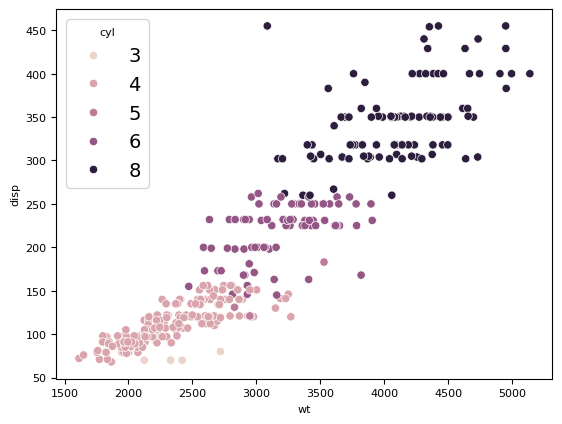

In [35]:
sns.scatterplot(x='wt', y='disp', hue='cyl', data=dfA)

### E. Share insights for Q2.d. [1 Marks]

1. Heavier cars use more cylinders and have higher displacement.
2. Very strong + corelation between weight and displacement
3. Very strong + corelation between weight and number of cylinders
4. Very strong + corelation between displacement and number of cylinders

### F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]

<Axes: xlabel='wt', ylabel='mpg'>

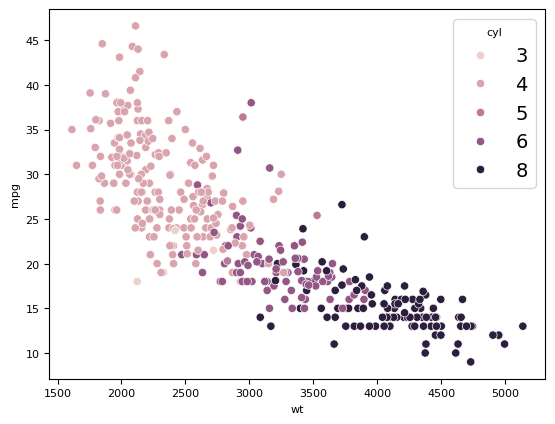

In [36]:
sns.scatterplot(x='wt', y='mpg', hue='cyl', data=dfA)

### G. Share insights for Q2.f. [1 Marks]

1. Heavier cars use more cylinders and give lesser mileage per gallon
2. Very strong - corelation between weight and miles per gallon
3. Very strong - corelation between number of cylinders and miles per gallong
4. Very strong + corelation between weight and number of cylinders

### H. Check for unexpected values in all the features and datapoints with such values. [2 Marks]
[Hint: ‘?’ is present in ‘hp’]

In [37]:
#I have already handled special characters in hp column earlier 
# as I wanted to include that in the pair plot
dfA.info()
#now all the columns are in their expected datatypes- except for car_name rest are all numeric

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    float64
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


## 3. Clustering: [15 Marks] 

### A. Apply K-Means clustering for 2 to 10 clusters. [3 Marks]

#### Scaling the data before applying KMean clustering

In [38]:
#dropping car name column
#dfKMean= dfA.drop('car_name', axis=1) 
dfKMean= dfA.drop(['car_name','origin'], axis=1) 


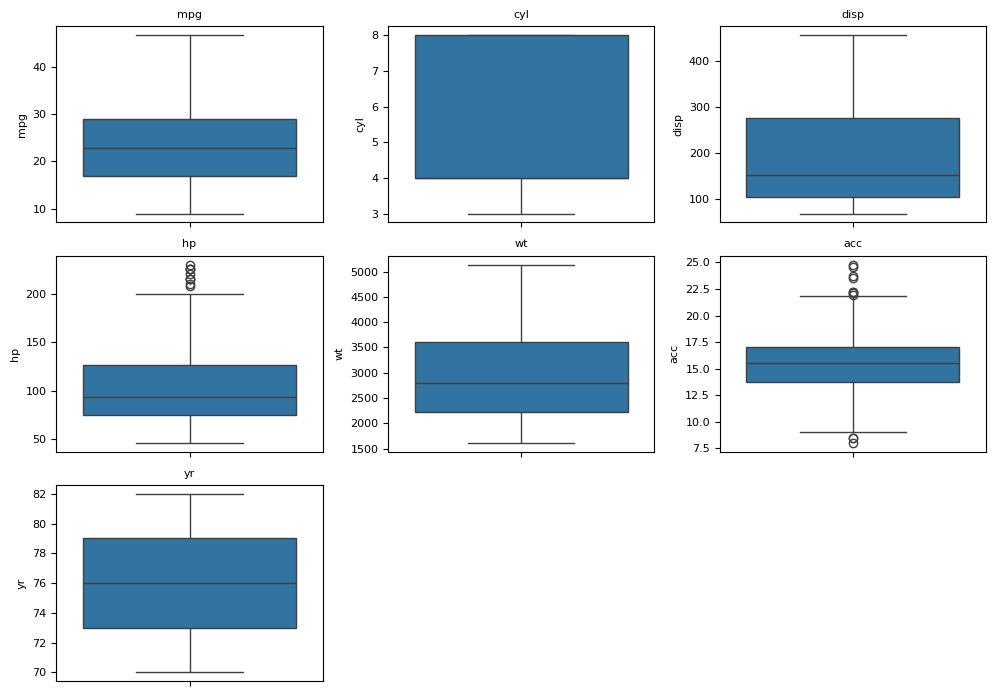

In [39]:
#check for ouliers using boxplot
plt.figure(figsize=(10, 7))

for i, variable in enumerate(dfKMean.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=dfKMean , y=variable ,whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


In [40]:
#Robust scaler has been used because there are outliers in mpg, hp and acc
from sklearn.preprocessing import RobustScaler
#columns to scale
cols_toScale=dfKMean.columns

robustScaler1 = RobustScaler()
#scaling using robust scaler
dfScaled = pd.DataFrame(robustScaler1.fit_transform(dfKMean),columns=dfKMean.columns,index=dfKMean.index)
dfScaled.head()
 

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.395833,1.0,0.913616,0.715686,0.504138,-1.076923,-1.0
1,-0.645833,1.0,1.165447,1.401961,0.640158,-1.230769,-1.0
2,-0.395833,1.0,0.978038,1.107843,0.455200,-1.384615,-1.0
3,-0.562500,1.0,0.896047,1.107843,0.453041,-1.076923,-1.0
4,-0.479167,1.0,0.884334,0.911765,0.464556,-1.538462,-1.0


In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

wcss=[]
silhouetteScores=[]
for i in range(2,11):
    km=KMeans(n_clusters=i,  random_state=42)
    km.fit(dfScaled)
    wcss.append(km.inertia_)
    labels = km.labels_
    score=silhouette_score(dfScaled,labels)
    print('Silhouette Score for %i Clusters: %0.4f' % (i, score))
    silhouetteScores.append(score)

Silhouette Score for 2 Clusters: 0.4721
Silhouette Score for 3 Clusters: 0.3213
Silhouette Score for 4 Clusters: 0.3042
Silhouette Score for 5 Clusters: 0.3133
Silhouette Score for 6 Clusters: 0.2791
Silhouette Score for 7 Clusters: 0.2722
Silhouette Score for 8 Clusters: 0.2606
Silhouette Score for 9 Clusters: 0.2678
Silhouette Score for 10 Clusters: 0.2561


Based on Silhoutte scores 2 clusters seems to be the best k value 

### B. Plot a visual and find elbow point. [2 Marks]

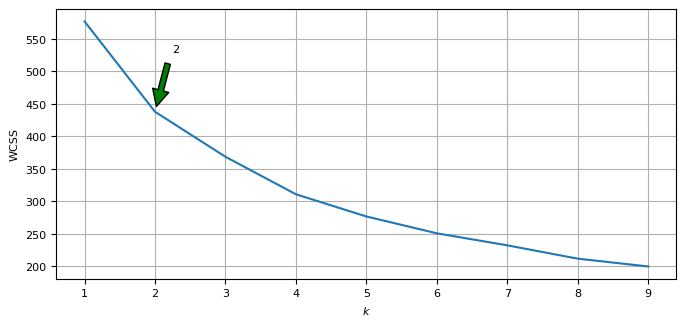

In [123]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1,10), wcss)
plt.xlabel("$k$")
plt.ylabel("WCSS")

plt.annotate("", xy=(2, wcss[1]), xytext=(2.2, 520),
             arrowprops=dict(facecolor='green', shrink=0.1))
plt.text(2.3, 530, "2", horizontalalignment="center")


plt.grid()
plt.show()

### C. On the above visual, highlight which are the possible Elbow points. [1 Marks]

- Based on both Elbow method and Shiloutte scores 2 seems to the best K value

### D. Train a K-means clustering model once again on the optimal number of clusters. [3 Marks]

In [43]:
kmOptimal=KMeans(n_clusters=2,  random_state=42)
clusters= kmOptimal.fit_predict(dfScaled)

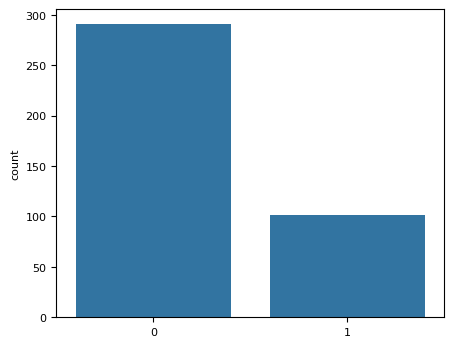

In [44]:
#number of points per cluster-wise
plt.figure(figsize = (5,4))
sns.countplot(x=clusters)
plt.show()
# there are more customers in cluster 0 than in 1

In [45]:
#Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(kmOptimal.cluster_centers_, columns = dfKMean.columns.tolist())

In [46]:
centroid_df

,mpg,cyl,disp,hp,wt,acc,yr
0,0.309579,0.152062,-0.052860,-0.163163,-0.158920,0.313085,0.127148
1,-0.666873,0.990099,1.139063,1.304892,0.944135,-0.852704,-0.379538


### E. Add a new feature in the DataFrame which will have labels based upon cluster value. [2 Marks]

In [47]:
dfA['cluster_no'] = kmOptimal.labels_
dfScaled['cluster_no'] = kmOptimal.labels_

In [48]:
dfA.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster_no
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,1


### F. Plot a visual and color the datapoints based upon clusters. [2 Marks]

In [49]:
from mpl_toolkits.mplot3d import Axes3D

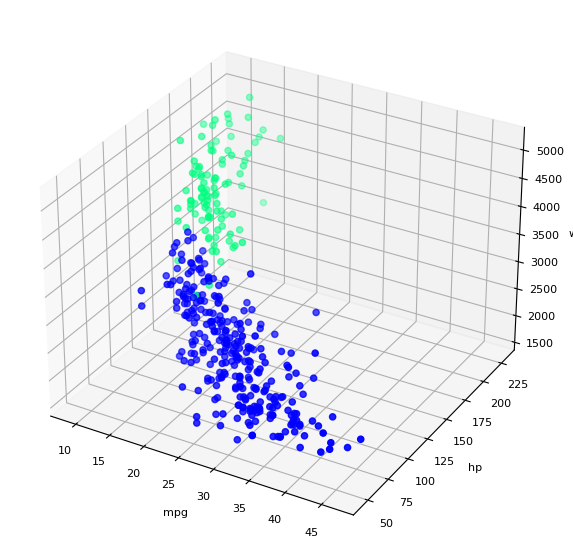

In [162]:

# Define cluster centers
cluster_centers = kmOptimal.cluster_centers_
C1 = cluster_centers[:, 0]
C2 = cluster_centers[:, 1]

# Define figure
fig= plt.figure(figsize=(10,7))
# Plot cluster centersax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
# ax = Axes3D(fig)
ax=fig.add_subplot(111,projection='3d')

# Define x, y, and z axis
x = dfA.iloc[:,1]
y = dfA.iloc[:,4]
z = dfA.iloc[:,5]

# Define axis labels
column_names = dfA.columns
ax.set_xlabel(column_names[1])
ax.set_ylabel(column_names[4])
ax.set_zlabel(column_names[5])

# Define markers and colors
ax.scatter(x, y, z, c = kmOptimal.labels_.astype(float), cmap = 'winter', marker = 'o')
 

# Define title
#plt.title("Visualization of clustered data with {} clusters".format(cluster), fontweight = 'bold')
plt.show()

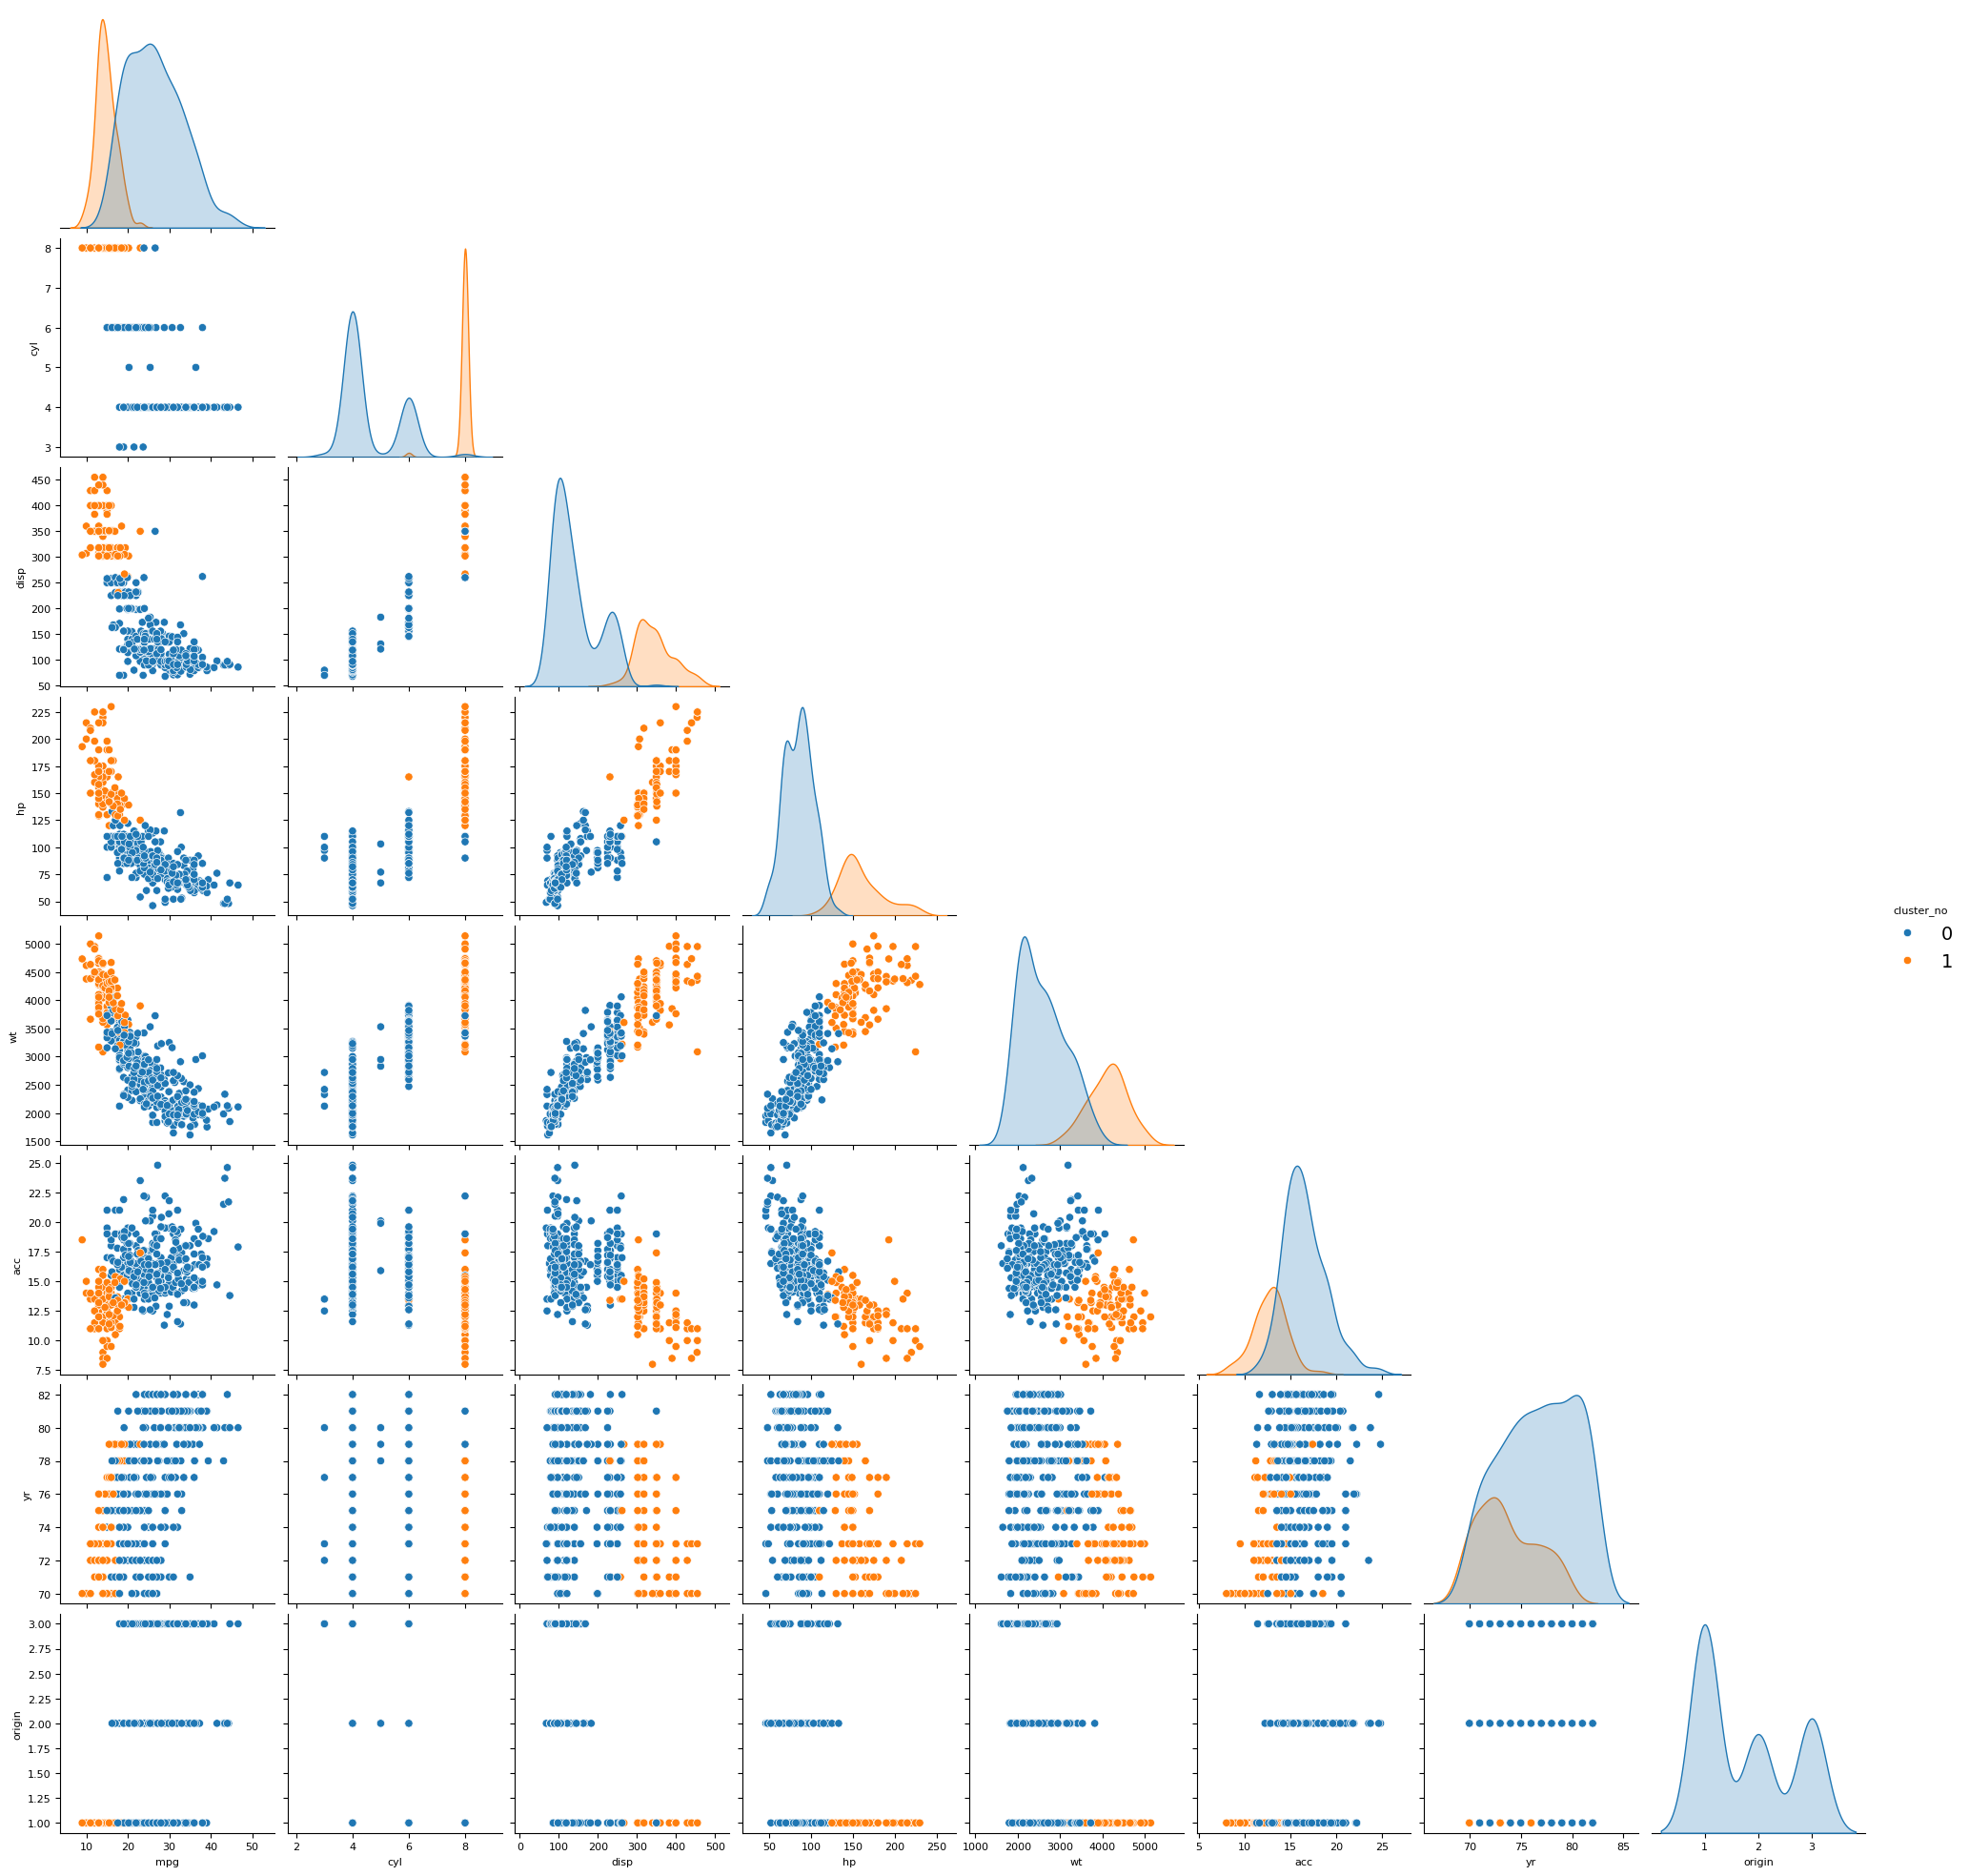

In [51]:
#Pait Plot with hue as Cluster_no
_ = sns.pairplot(dfA, diag_kind='kde', corner = True, hue = 'cluster_no') 

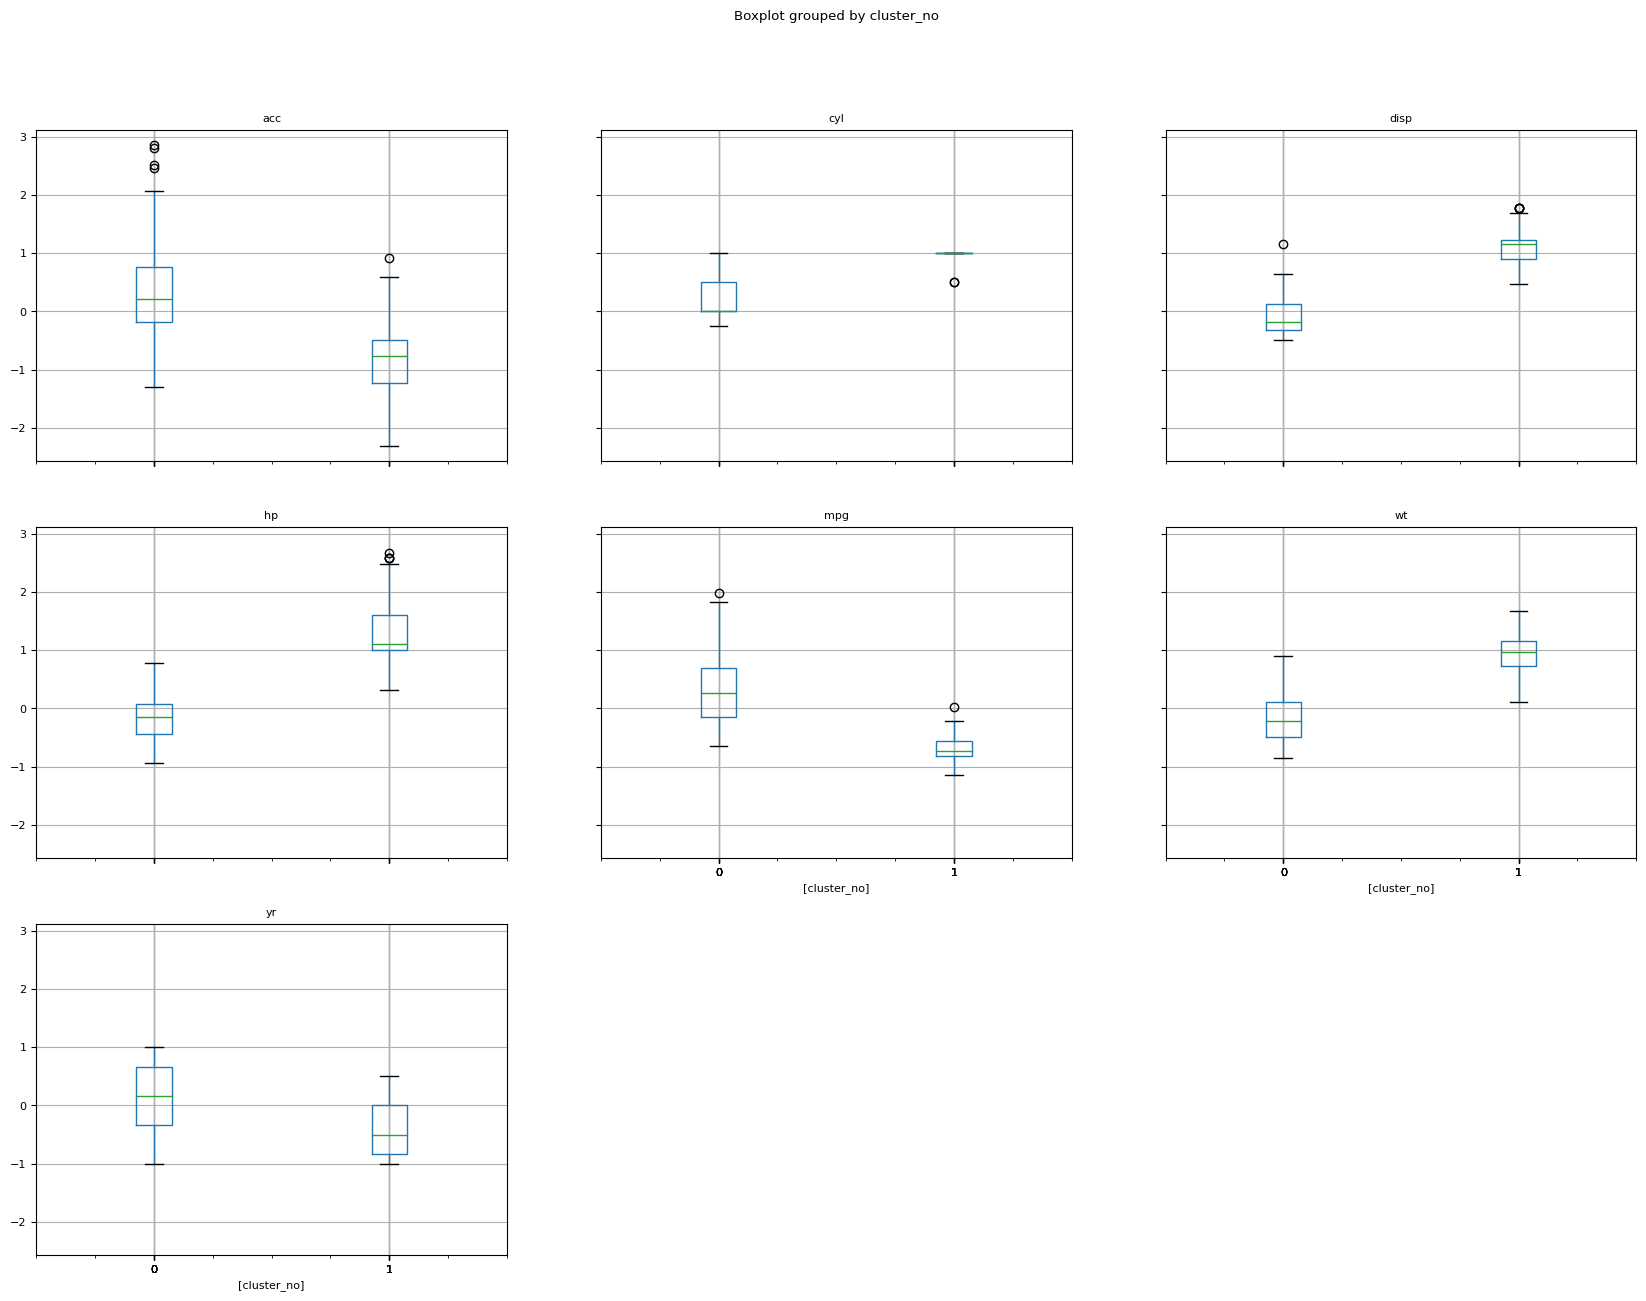

In [52]:
_ = dfScaled.boxplot(by = 'cluster_no',  layout=(3,3), figsize=(20, 15))

### G. Pass a new DataPoint and predict which cluster it belongs to. [2 Marks]

In [53]:
#mpg,cyl,disp,hp,wt,acc,yr 
#newData =pd.DataFrame(np.array("mpg":18.0 ,"cyl":8,"disp":307.0,"hp":130,"wt":3504,"acc":12.0,"yr":70))
newData_1 =pd.DataFrame([[25.0,4,120.0,50,1804,12.0,70]],
                      columns =["mpg","cyl","disp","hp","wt","acc","yr" ]) 


In [54]:
y=kmOptimal.predict(newData)


In [56]:
y[0]
# The New Data point belongs to cluster 1

1

# PART B

### 1. Data Understanding & Cleaning: [5 Marks]

### A. Read ‘vehicle.csv’ and save as DataFrame. [1 Marks]

In [57]:
dfB= pd.read_csv('vehicle.csv')

In [58]:
dfB.shape

(846, 19)

In [59]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [60]:
dfB.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### B. Check percentage of missing values and impute with correct approach. [1 Marks]

In [61]:
dfB.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [62]:
#% null values per column
percentage_null_percolumn(dfB)

Percentage of null values in compactness is: 0.00%
Percentage of null values in circularity is: 0.59%
Percentage of null values in distance_circularity is: 0.47%
Percentage of null values in radius_ratio is: 0.71%
Percentage of null values in pr.axis_aspect_ratio is: 0.24%
Percentage of null values in max.length_aspect_ratio is: 0.00%
Percentage of null values in scatter_ratio is: 0.12%
Percentage of null values in elongatedness is: 0.12%
Percentage of null values in pr.axis_rectangularity is: 0.35%
Percentage of null values in max.length_rectangularity is: 0.00%
Percentage of null values in scaled_variance is: 0.35%
Percentage of null values in scaled_variance.1 is: 0.24%
Percentage of null values in scaled_radius_of_gyration is: 0.24%
Percentage of null values in scaled_radius_of_gyration.1 is: 0.47%
Percentage of null values in skewness_about is: 0.71%
Percentage of null values in skewness_about.1 is: 0.12%
Percentage of null values in skewness_about.2 is: 0.12%
Percentage of null v

In [63]:
#Since the maximum percentage of null values in ay columns is very small (0.7%),
#replacing them with 0
dfB.fillna(0, inplace=True)

In [64]:
dfB.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### C. Visualize a Pie-chart and print percentage of values for variable ‘class’. [2 Marks]

In [65]:
dfB["class"].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

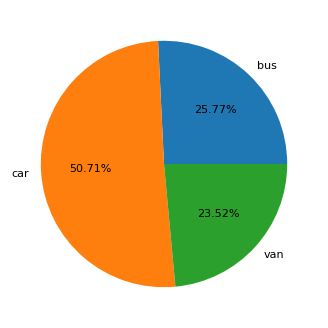

In [66]:
plt.figure(figsize=(5, 4))
# filter df and plot 'i' on the new subplot axis
dfB.groupby("class").size().plot(kind='pie', autopct='%.2f%%')
plt.show()

### D. Check for duplicate rows in the data and impute with correct approach. [1 Marks]

In [67]:
dfB.duplicated().sum()
#There are no duplicate rows in the data

0

## 2. Data Preparation: [2 Marks]

### Using Label Encoding on the dependent variable (class)

In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
dfB['class'] = label_encoder.fit_transform(dfB['class'])

In [69]:
#check which value has been assigned to which class
list(label_encoder.inverse_transform([0, 1, 2]))

['bus', 'car', 'van']

In [70]:
dfB.sample(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
389,100,57.0,107.0,207.0,63.0,11,227.0,30.0,25.0,180,234.0,756.0,205.0,72.0,6.0,19.0,186.0,198,1
72,92,39.0,91.0,191.0,62.0,8,176.0,37.0,21.0,137,196.0,466.0,151.0,67.0,3.0,23.0,192.0,200,1
337,99,51.0,88.0,188.0,62.0,5,203.0,32.0,23.0,158,222.0,625.0,219.0,77.0,8.0,26.0,191.0,190,0
342,83,37.0,54.0,131.0,61.0,4,135.0,50.0,18.0,127,152.0,271.0,141.0,85.0,3.0,6.0,180.0,183,1
58,107,53.0,103.0,221.0,66.0,11,209.0,32.0,24.0,163,222.0,653.0,212.0,66.0,0.0,1.0,191.0,201,1
409,86,38.0,86.0,175.0,60.0,9,170.0,39.0,21.0,134,191.0,433.0,138.0,68.0,1.0,28.0,191.0,199,1
94,84,45.0,66.0,154.0,65.0,6,145.0,46.0,19.0,144,168.0,312.0,177.0,73.0,2.0,3.0,184.0,188,0
19,101,56.0,100.0,215.0,0.0,10,208.0,32.0,24.0,169,227.0,651.0,223.0,74.0,6.0,5.0,186.0,193,1
503,91,39.0,72.0,133.0,55.0,7,146.0,46.0,19.0,132,170.0,314.0,149.0,77.0,9.0,18.0,184.0,189,1
753,91,36.0,72.0,162.0,60.0,8,150.0,44.0,19.0,133,166.0,334.0,121.0,63.0,2.0,22.0,196.0,205,1


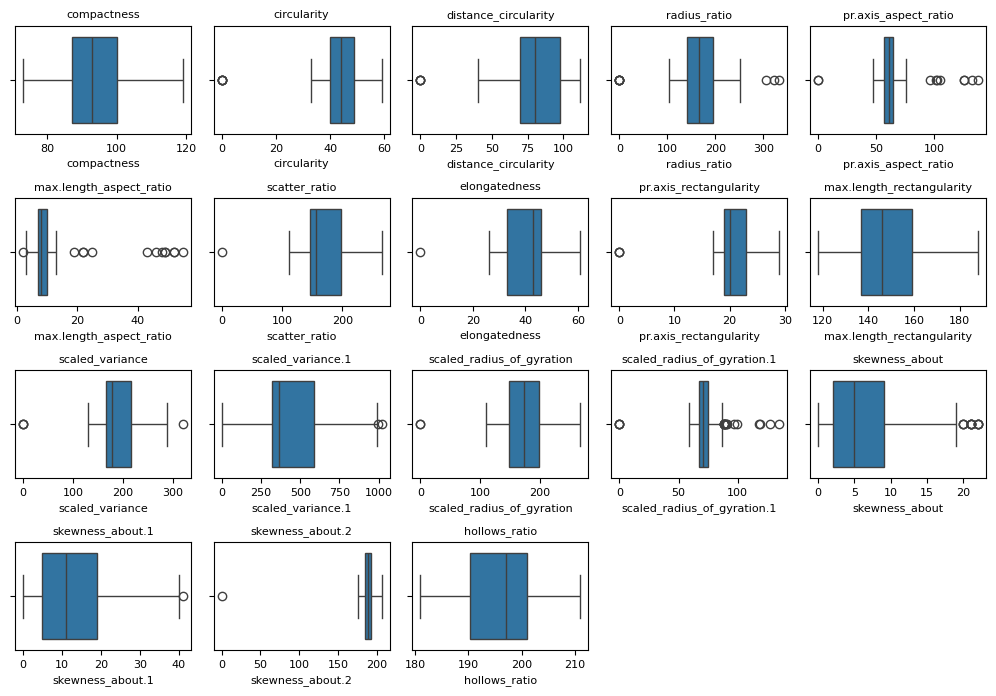

In [72]:
#Checking for outliers
plt.figure(figsize=(10, 7))

for i, variable in enumerate(dfB.columns[:-1]):
    plt.subplot(4,5,i+1)
    sns.boxplot(data=dfB ,  x=variable,whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### 
<p style="color:red;">As mentioned in the FAQs we will not be treating for outliers</p>

### A. Split data into X and Y. [Train and Test optional] [1 Marks]

In [73]:
from sklearn.model_selection import train_test_split
X= dfB.drop('class', axis=1)
y= dfB['class']

# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1  , stratify=y, shuffle = True)
# Stratify has been used to ensure equal distribution of churn values in both training and test (we have almost 3 times no of the yes churns

In [75]:
X_train.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
698,83,42.0,71.0,152.0,64.0,7,149.0,45.0,19.0,142,172.0,331.0,158.0,74.0,2.0,2.0,184.0,190
753,91,36.0,72.0,162.0,60.0,8,150.0,44.0,19.0,133,166.0,334.0,121.0,63.0,2.0,22.0,196.0,205
130,100,46.0,104.0,184.0,60.0,9,197.0,34.0,23.0,147,222.0,578.0,198.0,73.0,13.0,13.0,189.0,197
573,89,47.0,80.0,131.0,54.0,11,160.0,43.0,20.0,163,175.0,369.0,174.0,77.0,1.0,7.0,182.0,193
731,103,52.0,103.0,170.0,52.0,7,236.0,28.0,26.0,160,254.0,816.0,250.0,82.0,3.0,23.0,183.0,184


In [76]:
y_train.value_counts()

1    343
0    174
2    159
Name: class, dtype: int64

In [77]:
y_test.value_counts()

1    86
0    44
2    40
Name: class, dtype: int64

### B. Standardize the Data. [1 Marks]

In [78]:
#check the describtive summary of the data to observe the scale issue between the variables
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,676.0,93.633136,8.250972,73.0,87.0,93.0,99.0,119.0
circularity,676.0,44.717456,6.600453,0.0,40.0,44.0,50.0,59.0
distance_circularity,676.0,81.849112,16.536228,0.0,70.0,79.0,98.0,112.0
radius_ratio,676.0,168.039941,36.027724,0.0,141.0,168.0,195.0,333.0
pr.axis_aspect_ratio,676.0,61.650888,8.535556,0.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,676.0,8.650888,4.764624,3.0,7.0,8.0,10.0,55.0
scatter_ratio,676.0,168.750000,32.813293,112.0,147.0,157.0,198.0,265.0
elongatedness,676.0,40.831361,7.799979,0.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,676.0,20.486686,2.902586,0.0,19.0,20.0,23.0,29.0
max.length_rectangularity,676.0,147.937870,14.495945,118.0,137.0,146.0,160.0,188.0


In [134]:
from scipy.stats import zscore
#X_train_Scaled=X_train.apply(zscore)
#X_test_Scaled=X_test.apply(zscore)
#X_train_Scaled.head()

#Robust scaler has been used because there are outliers in mpg, hp and acc
from sklearn.preprocessing import RobustScaler
#columns to scale
cols_toScale=X_train.columns

robustScaler1 = RobustScaler()
#scaling using robust scaler
X_train_Scaled = pd.DataFrame(robustScaler1.fit_transform(X_train),columns=X_train.columns,
                              index=X_train.index)
X_test_Scaled = pd.DataFrame(robustScaler1.transform(X_test),columns=X_test.columns,
                              index=X_test.index)


X_train_Scaled.head()



,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
698,-0.833333,-0.2,-0.285714,-0.296296,0.375,-0.333333,-0.156863,0.153846,-0.25,-0.173913,-0.125000,-0.116541,-0.306122,0.375,-0.571429,-0.642857,-0.555556,-0.7
753,-0.166667,-0.8,-0.250000,-0.111111,-0.125,0.000000,-0.137255,0.076923,-0.25,-0.565217,-0.250000,-0.105263,-1.061224,-1.000,-0.571429,0.785714,0.777778,0.8
130,0.583333,0.2,0.892857,0.296296,-0.125,0.333333,0.784314,-0.692308,0.75,0.043478,0.916667,0.812030,0.510204,0.250,1.000000,0.142857,0.000000,0.0
573,-0.333333,0.3,0.035714,-0.685185,-0.875,1.000000,0.058824,0.000000,0.00,0.739130,-0.062500,0.026316,0.020408,0.750,-0.714286,-0.285714,-0.777778,-0.4
731,0.833333,0.8,0.857143,0.037037,-1.125,-0.333333,1.549020,-1.153846,1.50,0.608696,1.583333,1.706767,1.571429,1.375,-0.428571,0.857143,-0.666667,-1.3


In [135]:
X_test_Scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
403,0.250000,-0.5,-0.071429,-0.148148,0.125,0.000000,-0.333333,0.307692,-0.50,0.173913,-0.354167,-0.255639,-1.000000,-1.125,1.285714,-0.571429,1.333333,1.1
521,0.000000,-0.4,-0.214286,-0.537037,-0.375,-0.666667,-0.411765,0.461538,-0.50,-0.347826,-0.250000,-0.327068,-0.734694,0.250,-0.857143,-0.785714,-0.222222,-0.9
407,-0.166667,-0.6,-0.142857,-0.592593,-1.000,-0.666667,-0.254902,0.307692,-0.25,-0.652174,-0.270833,-0.214286,-0.489796,-0.250,-0.714286,-0.285714,-0.333333,-0.6
734,-0.416667,-0.4,-0.857143,-1.000000,-1.000,-0.333333,-0.490196,0.769231,-0.50,-0.304348,-0.750000,-0.424812,-0.306122,2.000,-0.857143,-0.285714,-1.444444,-1.4
163,-0.666667,-0.4,-0.250000,-0.537037,-0.250,-1.000000,-0.490196,0.538462,-0.50,-0.478261,-0.395833,-0.383459,-0.469388,-0.375,-0.428571,-0.142857,0.222222,-0.2


## 3. Model Building: [13 Marks]

### A. Train a base Classification model using SVM. [1 Marks]

In [81]:
from sklearn import svm

In [82]:
clf = svm.SVC()  
clf.fit(X_train_Scaled , y_train)

SVC()

### B. Print Classification metrics for train data. [1 Marks]

In [199]:
from sklearn.metrics import accuracy_score, classification_report ,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import label_binarize
scoresAll=[]

def getScores(yActual,yPred, TypeOfData):
    # Calculate performance metrics
    accuracy = accuracy_score(yActual, yPred)
    precision = precision_score(yActual, yPred,average='weighted')
    recall = recall_score(yActual, yPred,average='weighted')
    f1 = f1_score(yActual, yPred,average='weighted')
    # Print the performance metrics   
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    print('----------------------------------------------------------')
    print(classification_report(yActual, yPred))
    print('\n')
    
    
    
    return [accuracy, recall, precision, f1]

def saveScores(scores,modelType, train, test):
    scores.append([modelType,train[0],train[1],train[2],train[3],test[0],test[1],test[2],test[3]])
    return scores

In [200]:
y_pred_train= clf.predict(X_train_Scaled)
y_pred= clf.predict(X_test_Scaled)
train= getScores(y_train, y_pred_train, "Training")
test= getScores(y_test, y_pred, "Test")
scoresAll = saveScores(scoresAll,"BaseModel", train, test)
scoresAll

Accuracy: 0.9749
Precision: 0.9748
Recall: 0.9749
F1 Score: 0.9748
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       174
           1       0.97      0.98      0.98       343
           2       0.97      0.96      0.96       159

    accuracy                           0.97       676
   macro avg       0.97      0.97      0.97       676
weighted avg       0.97      0.97      0.97       676



Accuracy: 0.9294
Precision: 0.9324
Recall: 0.9294
F1 Score: 0.9301
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        44
           1       0.95      0.94      0.95        86
           2       0.84      0.93      0.88        40

    accuracy                           0.93       170
   macro avg       0.92      0.93      0.92       170
weighted avg       0.93      0.93      

[['BaseModel',
  0.9748520710059172,
  0.9748520710059172,
  0.9748219103259238,
  0.9748247947853274,
  0.9294117647058824,
  0.9294117647058824,
  0.9324478475360406,
  0.9301384950264935]]

In [201]:
def getScoresDataFrame (plotType, results):    
    # Convert results to a DataFrame
    columns = ['ModelType','Accuracy_Train', 'Recall_Train',  'Precision_Train', 'F1_Train', 'Accuracy_Test','Recall_Test', 'Precision_Test',  'F1_Test']
    #columns = ['ModelType',"DataType",'Accuracy', 'Recall',  'Precision', 'F1', 'ROC']
    dfResults =pd.DataFrame(results, columns=columns)
    if plotType != '':
        return dfResults[dfResults['ModelType']==plotType]
    
    return dfResults
  

In [202]:
getScoresDataFrame("", scoresAll)

,ModelType,Accuracy_Train,Recall_Train,Precision_Train,F1_Train,Accuracy_Test,Recall_Test,Precision_Test,F1_Test
0,BaseModel,0.974852,0.974852,0.974822,0.974825,0.929412,0.929412,0.932448,0.930138


### C. Apply PCA on the data with 10 components. [3 Marks]

<Axes: >

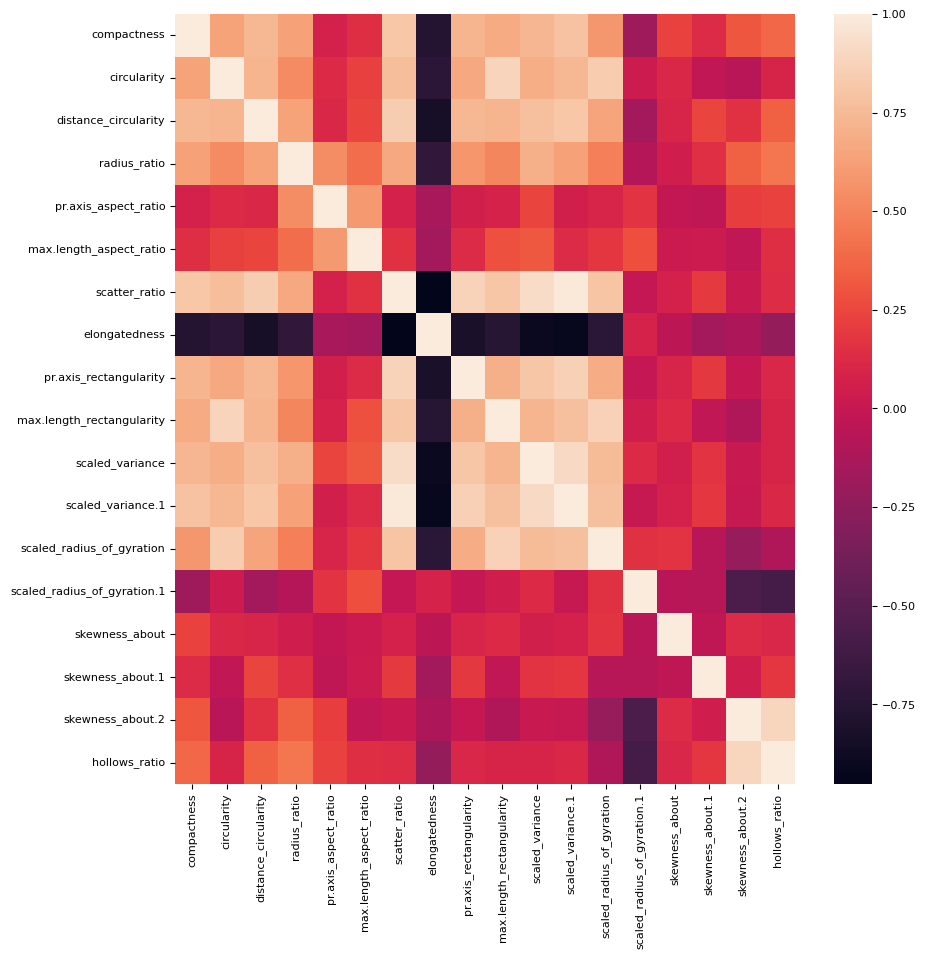

In [85]:
#check the presence of correlation between various dependendent features
plt.figure(figsize=(10,10))
sns.heatmap(X_train_Scaled.corr(),   fmt=".2f")

In [86]:
#we can also perform Bartlette test to valdiate the hypothesis that there is no sigificant 
#correlation between the features
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value= calculate_bartlett_sphericity(X_train_Scaled)

In [87]:
p_value
# As p_value<0.5, we reject the null hypothesis that there is no significant dependence

0.0

In [220]:
#performing Kizer Meyer Olkin test to confirm if we have adequate sample size
from factor_analyzer.factor_analyzer import  calculate_kmo
kmo_all, kmo_model= calculate_kmo(X_train_Scaled)
kmo_model
#since this is greater than 0.7 we have good sample size for performing PCA

0.8824705425439374

In [88]:
#Calculate PCA
from sklearn.decomposition import PCA
pca= PCA(n_components=10, random_state= 123)
X_train_Scaled_pca_1= pca.fit_transform(X_train_Scaled)

In [89]:
#eigen vectors
pca.components_

array([[ 0.22970464,  0.23310964,  0.21700906,  0.25479727,  0.26784588,
         0.52822684,  0.24652602, -0.2256567 ,  0.24797321,  0.23332153,
         0.2724823 ,  0.24442899,  0.22452895,  0.08599675,  0.03514581,
         0.03655664,  0.02462191,  0.0866702 ],
       [-0.21995994, -0.14796014, -0.16657386, -0.06357322,  0.32689345,
         0.6246092 , -0.20855966,  0.18847025, -0.21642059, -0.13459647,
        -0.1296062 , -0.21394848, -0.14019315,  0.38565165, -0.04991735,
        -0.04941025, -0.09924021, -0.10599068],
       [ 0.03376799, -0.10594581,  0.01364138,  0.12495564,  0.26011616,
         0.19239781, -0.10056063,  0.04416065, -0.10944166, -0.11280399,
        -0.10006899, -0.11333681, -0.19326702, -0.63278125,  0.03288367,
         0.0429233 ,  0.40298244,  0.45216278],
       [ 0.01766934,  0.05403162,  0.06203894, -0.24540788, -0.71226712,
         0.51331441, -0.02318914,  0.06681933, -0.02207202,  0.12372146,
        -0.07888489, -0.03618953,  0.01047014, -0.285

In [90]:
#check the eigen values
#always returned in descending order
pca.explained_variance_

array([4.27425301, 2.75531927, 1.86938333, 0.68016528, 0.53640298,
       0.46962628, 0.31725872, 0.20568743, 0.11295507, 0.09921158])

In [91]:
#check the explained variance of each PC
#Note: Explaine variance = eigen value of each pc/sum of eigen values of all the pcs
pca.explained_variance_ratio_

array([0.36665863, 0.2363598 , 0.16036148, 0.05834668, 0.04601431,
       0.04028599, 0.02721543, 0.0176445 , 0.00968964, 0.00851068])

In [92]:
#create a dataframe containing the coefficient of each PC
df_extracted_loadings= pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'], index= X_train_Scaled.columns)


In [93]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
compactness,0.229705,-0.219960,0.033768,0.017669,0.102920,-0.156183,-0.218616,0.172755,-0.021854,0.840719
circularity,0.233110,-0.147960,-0.105946,0.054032,0.120291,0.241411,-0.015847,-0.516150,-0.055255,0.061641
distance_circularity,0.217009,-0.166574,0.013641,0.062039,-0.082563,-0.043349,0.009026,-0.120765,0.070182,-0.198319
radius_ratio,0.254797,-0.063573,0.124956,-0.245408,-0.041484,-0.045372,-0.015372,0.094817,0.499680,-0.111561
pr.axis_aspect_ratio,0.267846,0.326893,0.260116,-0.712267,0.122448,0.155076,0.341428,-0.063811,-0.173319,0.132954
max.length_aspect_ratio,0.528227,0.624609,0.192398,0.513314,-0.076486,0.019121,-0.029030,0.107096,0.005701,-0.011709
scatter_ratio,0.246526,-0.208560,-0.100561,-0.023189,-0.077237,-0.031004,0.017625,0.104994,0.074818,-0.020044
elongatedness,-0.225657,0.188470,0.044161,0.066819,0.083897,0.001582,0.013265,-0.100771,-0.151312,0.185494
pr.axis_rectangularity,0.247973,-0.216421,-0.109442,-0.022072,-0.080472,-0.089095,0.084210,0.328785,-0.753139,-0.225328
max.length_rectangularity,0.233322,-0.134596,-0.112804,0.123721,0.101603,0.201511,-0.051597,-0.360696,-0.136204,0.118645


### D. Visualize Cumulative Variance Explained with Number of Components. [2 Marks]

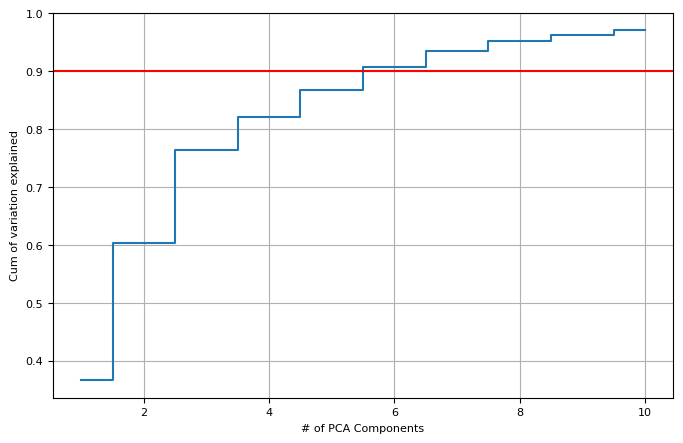

In [94]:
plt.figure(figsize=(8,5))
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.ylabel('Cum of variation explained')
plt.xlabel('# of PCA Components')
plt.grid()
plt.show()

### E. Draw a horizontal line on the above plot to highlight the threshold of 90%. [1 Marks]

In [96]:
#check the cummulative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.36665863, 0.60301843, 0.76337991, 0.82172659, 0.86774089,
       0.90802689, 0.93524232, 0.95288682, 0.96257646, 0.97108713])

<p style="color:blue;">PC1, PC2, PC3, PC4, PC5, PC6 are able to capture 91% of the variance in the data</p>

### F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. [2 Marks]

In [137]:
#Calculate PCA
pca1= PCA(n_components=6, random_state= 123)
X_train_Scaled_pca_2= pca1.fit_transform(X_train_Scaled)
X_test_Scaled_pca_2= pca1.transform(X_test_Scaled)

In [125]:
#choose the PCs basis cummulative  explained variance
df_extracted_loadings_1= pd.DataFrame(pca1.components_.T,
                                      columns=['PC1','PC2','PC3','PC4','PC5','PC6'], index= X_train_Scaled.columns)
df_selected_1= df_extracted_loadings_1[['PC1','PC2','PC3','PC4','PC5','PC6']]

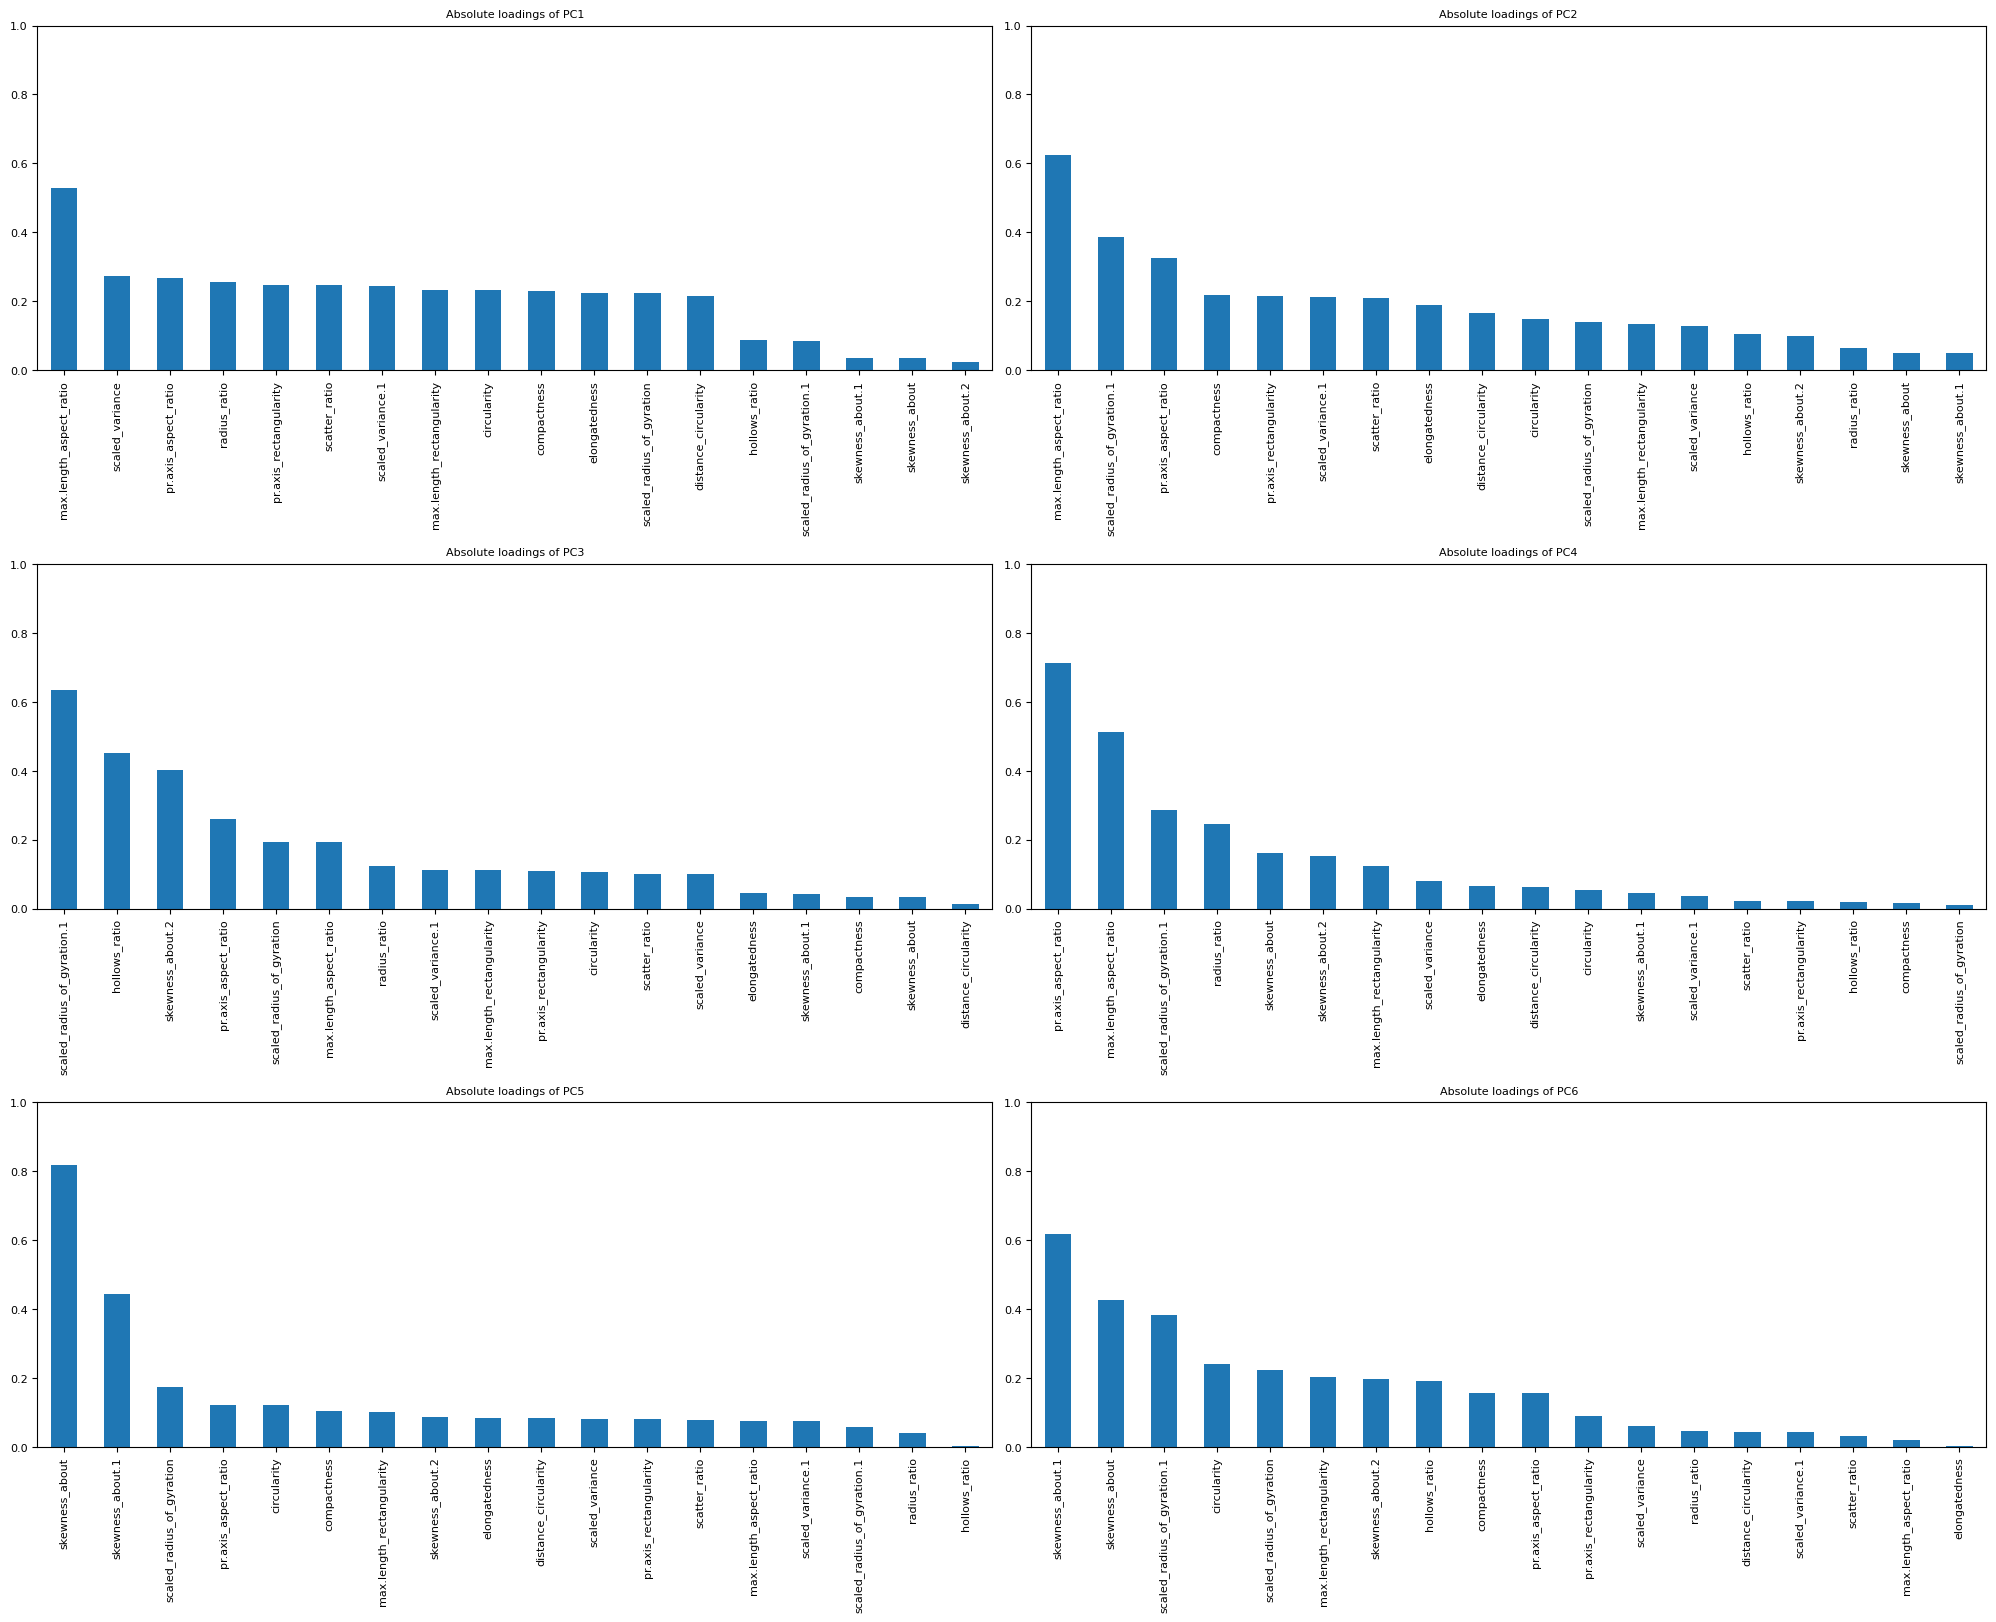

In [127]:
#check how each original feature matters for each PC
#note: here we are only considering the absolute values
plt.figure(figsize=(20,20))
for i in range(len(df_selected_1.columns)):
    plt.subplot(4,2,i+1)
    abs(df_selected_1[df_selected_1.columns[i]]).T.sort_values(ascending =False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title("Absolute loadings of {}".format(df_selected_1.columns[i]))
    plt.tight_layout()

<Axes: >

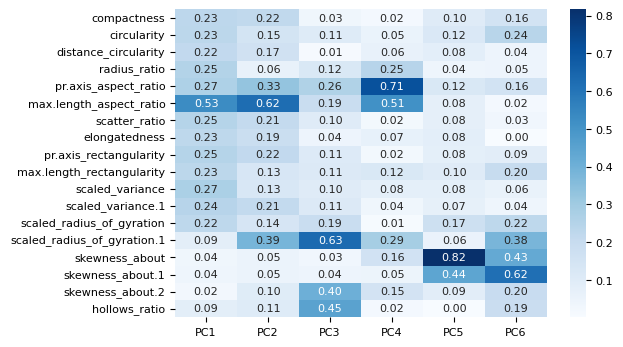

In [128]:
#compare how original features influence various PCs
plt.figure(figsize=(6,4))
sns.heatmap(abs(df_selected_1), annot=True, cmap="Blues", fmt=".2f")

<Axes: >

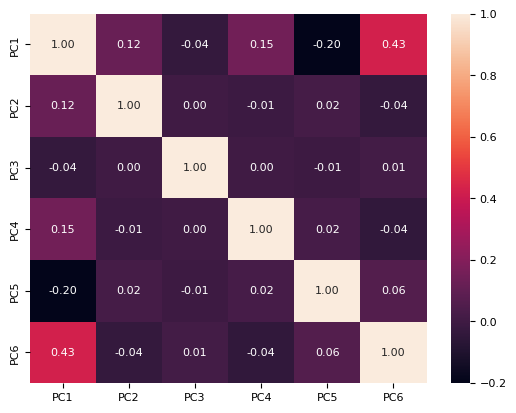

In [129]:
#check for presence of correlation between the various principal components
sns.heatmap(df_selected_1.corr(), annot=True, fmt='.2f')

### G. Train SVM model on components selected from above step. [1 Marks]

In [130]:
svmclassifier_2 = svm.SVC()  
svmclassifier_2.fit(X_train_Scaled_pca_2 , y_train)

SVC()

### H. Print Classification metrics for train data of above model and share insights. [2 Marks]

In [203]:
y_pred_train_pca= svmclassifier_2.predict(X_train_Scaled_pca_2)
y_pred_test_pca= svmclassifier_2.predict(X_test_Scaled_pca_2)
train_pca= getScores(y_train, y_pred_train_pca, "Training")
test_pca= getScores(y_test, y_pred_test_pca, "Test")
scoresAll = saveScores(scoresAll,"BaseModelWithPCA", train_pca, test_pca)

Accuracy: 0.9231
Precision: 0.9236
Recall: 0.9231
F1 Score: 0.9233
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       174
           1       0.94      0.93      0.93       343
           2       0.86      0.88      0.87       159

    accuracy                           0.92       676
   macro avg       0.92      0.92      0.92       676
weighted avg       0.92      0.92      0.92       676



Accuracy: 0.8471
Precision: 0.8497
Recall: 0.8471
F1 Score: 0.8480
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        44
           1       0.89      0.86      0.88        86
           2       0.74      0.80      0.77        40

    accuracy                           0.85       170
   macro avg       0.83      0.84      0.84       170
weighted avg       0.85      0.85      

In [204]:
getScoresDataFrame("", scoresAll)

,ModelType,Accuracy_Train,Recall_Train,Precision_Train,F1_Train,Accuracy_Test,Recall_Test,Precision_Test,F1_Test
0,BaseModel,0.974852,0.974852,0.974822,0.974825,0.929412,0.929412,0.932448,0.930138
1,BaseModelWithPCA,0.923077,0.923077,0.923565,0.923278,0.847059,0.847059,0.849660,0.847982


#### 
<p style="color:blue;">There is a small decrease in auuracy on the training dataset when using PCA, but the number of features was decrease from initial 19 features to 6 features
    </p?\>

## 4. Performance Improvement: [5 Marks]

### A. Train another SVM on the components out of PCA. Tune the parameters to improve performance. [2 Marks]

In [151]:
from sklearn.model_selection import GridSearchCV 
# Define the parameter grid to search through
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, .0001], 
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Create GridSearchCV
grid_search_svm = GridSearchCV(svm.SVC(), param_grid,  refit = True, cv=3)

# Fit the model using GridSearchCV
grid_search_svm.fit(X_train_Scaled_pca_2, y_train)


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

### B. Share best Parameters observed from above step. [1 Marks]

In [152]:
print(grid_search_svm.best_params_ ) 

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


### C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights. [2 Marks]

In [205]:
y_pred_train_pca_svm1 = grid_search_svm.predict(X_train_Scaled_pca_2)
y_pred_test_pca_svm1= grid_search_svm.predict(X_test_Scaled_pca_2)

train_pca_grid= getScores(y_train, y_pred_train_pca_svm1, "Training")
test_pca_grid= getScores(y_test, y_pred_test_pca_svm1, "Test")
scoresAll = saveScores(scoresAll,"HyperParameterTunedModelWithPCA", train_pca_grid, test_pca_grid)

Accuracy: 0.9527
Precision: 0.9529
Recall: 0.9527
F1 Score: 0.9527
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       174
           1       0.96      0.95      0.96       343
           2       0.92      0.94      0.93       159

    accuracy                           0.95       676
   macro avg       0.95      0.95      0.95       676
weighted avg       0.95      0.95      0.95       676



Accuracy: 0.8529
Precision: 0.8577
Recall: 0.8529
F1 Score: 0.8544
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        44
           1       0.90      0.87      0.89        86
           2       0.73      0.82      0.78        40

    accuracy                           0.85       170
   macro avg       0.84      0.85      0.84       170
weighted avg       0.86      0.85      

In [206]:
getScoresDataFrame("", scoresAll)

,ModelType,Accuracy_Train,Recall_Train,Precision_Train,F1_Train,Accuracy_Test,Recall_Test,Precision_Test,F1_Test
0,BaseModel,0.974852,0.974852,0.974822,0.974825,0.929412,0.929412,0.932448,0.930138
1,BaseModelWithPCA,0.923077,0.923077,0.923565,0.923278,0.847059,0.847059,0.849660,0.847982
2,HyperParameterTunedModelWithPCA,0.952663,0.952663,0.952878,0.952695,0.852941,0.852941,0.857683,0.854416


In [209]:
def getPercentage(old,new):
    return (new-old)*100/old

In [216]:
def getPerformanceImprovements (baseModel, tunedModel , scores):
    results=getScoresDataFrame("", scores)
    
    df1Base= results.loc[(results['ModelType']==baseModel)]
    df1Tuned= results.loc[(results['ModelType']==tunedModel)]
    df1Tuned
    #print(df1Base.iloc[0]["Accuracy_Train"])
    print (f'--Performance Improvement between {baseModel} and {tunedModel}---')

    print('\nTrain Data')
    print (f'Accuracy {getPercentage(df1Base.iloc[0]["Accuracy_Train"],df1Tuned.iloc[0]["Accuracy_Train"]):.2f}%')
    print (f'Recall {getPercentage(df1Base.iloc[0]["Recall_Train"],df1Tuned.iloc[0]["Recall_Train"]):.2f}%')
    print (f'Precision {getPercentage(df1Base.iloc[0]["Precision_Train"],df1Tuned.iloc[0]["Precision_Train"]):.2f}%')
    print (f'F1_Score {getPercentage(df1Base.iloc[0]["F1_Train"],df1Tuned.iloc[0]["F1_Train"]):.2f}%')

    print('\nTest Data')
    print (f'Accuracy {getPercentage(df1Base.iloc[0]["Accuracy_Test"],df1Tuned.iloc[0]["Accuracy_Test"]):.2f}%')
    print (f'Recall {getPercentage(df1Base.iloc[0]["Recall_Test"],df1Tuned.iloc[0]["Recall_Test"]):.2f}%')
    print (f'Precision {getPercentage(df1Base.iloc[0]["Precision_Test"],df1Tuned.iloc[0]["Precision_Test"]):.2f}%')
    print (f'F1_Score {getPercentage(df1Base.iloc[0]["F1_Test"],df1Tuned.iloc[0]["F1_Test"]):.2f}%')

    

In [217]:
getPerformanceImprovements("BaseModel",'BaseModelWithPCA',scoresAll)

--Performance Improvement between BaseModel and BaseModelWithPCA---

Train Data
Accuracy -5.31%
Recall -5.31%
Precision -5.26%
F1_Score -5.29%

Test Data
Accuracy -8.86%
Recall -8.86%
Precision -8.88%
F1_Score -8.83%


In [218]:
getPerformanceImprovements('BaseModelWithPCA',"HyperParameterTunedModelWithPCA",scoresAll)

--Performance Improvement between BaseModelWithPCA and HyperParameterTunedModelWithPCA---

Train Data
Accuracy 3.21%
Recall 3.21%
Precision 3.17%
F1_Score 3.19%

Test Data
Accuracy 0.69%
Recall 0.69%
Precision 0.94%
F1_Score 0.76%


<p style="color:blue;"> <b> Observation</b></p>

<p style="color:green;">
After appying PCA the overfitting issue on the train dataset was improved. The scores on training dataset reduced by ~5.3% across various metrices
</p>

<p style="color:green;">
With the Hyperparamter tuning the scores were improved on the train data by ~3.2% over all the metrices
</p>

## 5. Data Understanding & Cleaning: [5 Marks]

### A. Explain pre-requisite/assumptions of PCA. [2 Marks]

1. There must be correlation between independent variables (the features in our sample we correlated. we checked this using the heat map and Bartlette test)
2. Variables should be continous
3. Data should be free from outliers - we did not remove outliers as per the guidelines in the FAQ.
4. Variables should be on the same scale - we used robust scaler to do this
5. Large Sample Size: While PCA can be applied to small datasets, it tends to perform better with larger sample sizes. We had good sample size to perform PCA (we tested this using Kizer Meyer Olkin test which gave the result of .0.8824705425439374 (>0.7 meas we have good sample size)

### B. Explain advantages and limitations of PCA. [3 Marks

### Advantages

1. Reduces compuational requriements - RAM, GPU as lesser features now have to be processed
2. Makes the processing faster as lesser number of features need to be processed
3. Helps reducing the number of features, thus reducing the curse of dimensionality - removes the number of unrequried features  - those that have very less impact on the prediciton 
4. helps to reduce overfitting 
5. Helps improve data visualization- if we are able to reduce the dimensions to 2 or 3 then we can plot the data in 2D or 3D graphs which helps to understand the data better.
6. Space saving, as PCA compresses the data

### Disadvantages

1. Transformed features are not intutive and are hard to interpret. This will make it difficut to explain the outcomes to business. 
2. Some Information is lost from the original data. We can try to get back the original data by using the inverse transformatio of PCA, we will still not be able to get back all the data since we did loss some of the data during projection. In our case we dropped the components that accounted for 10% of the variance data.
3. The machine Learning pipelines becomes complex.